# This notebook is dedicated to EDA
***
Our main aim is to make use of the various indicators to predict the global sales of games

In [342]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

# data = pd.read_csv("cleaned_data.csv")

# importing main data
vg_sales = pd.read_csv("Final Data.csv")
vg_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61267 entries, 0 to 61266
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          61267 non-null  int64  
 1   Name          61267 non-null  object 
 2   Platform      61267 non-null  object 
 3   Year          56554 non-null  float64
 4   Genre         61267 non-null  object 
 5   Publisher     61267 non-null  object 
 6   Developer     61267 non-null  object 
 7   Critic_Score  6551 non-null   float64
 8   User_Score    402 non-null    float64
 9   NA_Sales      13656 non-null  float64
 10  PAL_Sales     14020 non-null  float64
 11  JP_Sales      7672 non-null   float64
 12  Other_Sales   16365 non-null  float64
 13  Global_Sales  20302 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 6.5+ MB


Things to note from the initial dataset
* There are a lot of datapoints that have null values
* There are a total of `14` columns with `61267` rows
* There is `1` variable identified as `int64`
* There are `5` variables identified as `object`
* There are `8` variables identified as `float64`
* Rank is rather useless to us as this is merely used as an index

***
## Merging Datasets

Since there are a lot of datapoints that have null values and we feel that we don't have enough usable indicators, we have decided to merge the dataset with another dataset (metaCritic.csv)

The code for the merging of data is in "data_cleaning.ipynb", and the csv output is saved as "merged_dataSet.csv"

In [343]:
# dropping the first column as we will not be using this
vg_sales.drop("Rank", axis=1, inplace=True)

# reading the new data to merge
metaCritic = pd.read_csv("meta_critic.csv")
metaCritic.head()

,name,platform,release_date,summary,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,7.4
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",98,8.4
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9


Change the column of user_review in metaCritic CSV to meta_UserReview. The columns name and platform are also changed so that merging could be done later.

In [344]:
# columns to merge
metaCritic.rename(columns={'user_review':'meta_UserReview','name':'Name','platform':'Platform'},inplace=True)

The user_score column and critic score in vgSales.csv are changed to vg_user_score and vg_critic_score to so that the columns are clearly identified later in the model.

In [345]:
vg_sales.rename(columns={'User_Score':'vg_user_score','Critic_Score':'vg_critic_score','Rank':'vg_Rank'},inplace=True)
vg_sales['Platform'].unique()

array(['Series', 'All', 'Wii', 'NS', 'NES', 'PC', 'GB', 'DS', 'X360',
       'SNES', 'PS3', 'PS4', '3DS', 'PS2', 'GBA', 'GEN', 'N64', 'PS',
       'XOne', 'WiiU', 'XB', 'PSP', '2600', 'GC', 'GBC', 'iOS', 'PSN',
       'PSV', 'DC', 'XBL', 'SAT', 'SCD', 'PS5', '3DO', 'WS', 'Amig', 'VC',
       'NG', 'WW', 'PCE', 'GG', 'OSX', 'PCFX', 'Mob', 'And', 'Ouya',
       'DSiW', 'MS', 'DSi', 'VB', 'Linux', 'MSD', 'C128', 'AST', 'Lynx',
       '7800', '5200', 'S32X', 'MSX', 'FMT', 'ACPC', 'C64', 'BRW', 'AJ',
       'ZXS', 'NGage', 'GIZ', 'WinP', 'iQue', 'Arc', 'ApII', 'Aco',
       'BBCM', 'TG16', 'CDi', 'CD32', 'XS', 'CV', 'OR', 'Int'],
      dtype=object)

Setting up the various arrays to be merged

In [346]:
# dataset to be merged
temp = metaCritic[['Name','Platform','meta_score','meta_UserReview']]
array = temp['Platform'].unique()
print(array)

[' Nintendo 64' ' PlayStation' ' PlayStation 3' ' Dreamcast' ' Xbox 360'
 ' Wii' ' Xbox One' ' PC' ' Switch' ' PlayStation 2' ' PlayStation 4'
 ' GameCube' ' Xbox' ' Wii U' ' Game Boy Advance' ' 3DS' ' Xbox Series X'
 ' DS' ' PlayStation Vita' ' PlayStation 5' ' PSP' ' Stadia']


In [347]:
# dictonary that contains the keywords that needs to be swapped
conversion = {
    ' Nintendo 64':'N64' ,
    ' PlayStation': 'PS' ,
    ' PlayStation 3': 'PS3', 
    ' Dreamcast': 'DC',
    ' Xbox 360':'X360',
    ' Wii':'Wii',
    ' Xbox One':'XOne',
    ' PC' : 'PC',
    ' Switch': 'NS',
    ' PlayStation 2': 'PS2',
    ' PlayStation 4': 'PS4',
    ' GameCube': 'GCN',
    ' Xbox': 'XB',
    ' Wii U': 'WiiU',
    ' Game Boy Advance': 'GBA',
    ' 3DS': '3DS',
    ' Xbox Series X': 'XSX',
    ' DS': 'DS',
    ' PlayStation Vita': 'PSV',
    ' PlayStation 5': 'PS5',
    ' PSP': 'PSP',
    ' Stadia': 'PC',    
 }
 
temp = temp.replace({'Platform': conversion})

Merging the datasets

In [348]:
# merging the datasets have also removed many duplicate datapoints
merged_dataSet = pd.merge(temp,vg_sales,on=["Name","Platform"])

# making sure everything worked
merged_dataSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10996 entries, 0 to 10995
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             10996 non-null  object 
 1   Platform         10996 non-null  object 
 2   meta_score       10996 non-null  int64  
 3   meta_UserReview  10996 non-null  object 
 4   Year             10412 non-null  float64
 5   Genre            10996 non-null  object 
 6   Publisher        10996 non-null  object 
 7   Developer        10996 non-null  object 
 8   vg_critic_score  3417 non-null   float64
 9   vg_user_score    261 non-null    float64
 10  NA_Sales         6144 non-null   float64
 11  PAL_Sales        6455 non-null   float64
 12  JP_Sales         2334 non-null   float64
 13  Other_Sales      6930 non-null   float64
 14  Global_Sales     7156 non-null   float64
dtypes: float64(8), int64(1), object(6)
memory usage: 1.3+ MB


There's a Name column that we do not need (first column)

In [349]:
# # removing the first column
# merged_dataSet.drop("Name", axis=1, inplace=True)

# # making sure everything worked
# merged_dataSet.info()

Exporting the new data as a csv file

In [350]:
merged_dataSet.to_csv('EDA_merged_dataSet.csv', index = False)

***
## Cleaning Dataset

After merging the datasets, we obtain "EDA_merged_dataSet.csv" and we will import this as <span style="font-family:Courier New">merged_data</span> for future use

In [351]:
# getting rid of the old dataset to save some memory
del(vg_sales)

# importing new data
merged_data = pd.read_csv("EDA_merged_dataSet.csv")

merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10996 entries, 0 to 10995
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             10996 non-null  object 
 1   Platform         10996 non-null  object 
 2   meta_score       10996 non-null  int64  
 3   meta_UserReview  10996 non-null  object 
 4   Year             10412 non-null  float64
 5   Genre            10996 non-null  object 
 6   Publisher        10996 non-null  object 
 7   Developer        10996 non-null  object 
 8   vg_critic_score  3417 non-null   float64
 9   vg_user_score    261 non-null    float64
 10  NA_Sales         6144 non-null   float64
 11  PAL_Sales        6455 non-null   float64
 12  JP_Sales         2334 non-null   float64
 13  Other_Sales      6930 non-null   float64
 14  Global_Sales     7156 non-null   float64
dtypes: float64(8), int64(1), object(6)
memory usage: 1.3+ MB


In [352]:
merged_data.head()

,Name,Platform,meta_score,meta_UserReview,Year,Genre,Publisher,Developer,vg_critic_score,vg_user_score,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales
0,The Legend of Zelda: Ocarina of Time,N64,99,9.1,1998.0,Adventure,Nintendo,Nintendo EAD,9.9,10.0,4.10,1.89,1.45,0.16,7.60
1,Tony Hawk's Pro Skater 2,PS,98,7.4,2000.0,Sports,Activision,Neversoft Entertainment,9.3,NaN,3.05,1.41,0.02,0.20,4.68
2,Grand Theft Auto IV,PS3,98,7.7,2008.0,Action,Rockstar Games,Rockstar North,10.0,9.0,4.79,3.73,0.44,1.62,10.57
3,SoulCalibur,DC,98,8.4,1999.0,Fighting,Namco,Namco,9.6,NaN,NaN,NaN,0.34,0.00,0.34
4,Grand Theft Auto IV,X360,98,7.9,2008.0,Action,Rockstar Games,Rockstar North,10.0,NaN,6.80,3.11,0.14,1.04,11.09


Things to note from the merged dataset
* meta_score, meta_userReview and an index (the first column) have been added
* Duplicated datapoints have been removed as a result of the merging
* meta_userReview is identified as an object but it contains float values
* Some columns from the original dataset have been renamed to avoid confusion 
* There are still some null values that we have to deal with
* We assume the NA vales in the sales categories to mean that there were no sales in those regions
* We are predicting the total sales of the games, but there is no data for total sales

In [353]:
# converting meta_userReview to float value

merged_data.loc[(merged_data['meta_UserReview'] == 'tbd')] = None
merged_data['meta_UserReview'] = merged_data['meta_UserReview'].astype(float)

In [354]:
# removing the rows with NULL values for year
merged_data.dropna(subset=['Year'], inplace=True)

# converting Year to an int64 type
merged_data['Year'] = merged_data['Year'].astype(int)

# making sure everything worked
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9940 entries, 0 to 10995
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             9940 non-null   object 
 1   Platform         9940 non-null   object 
 2   meta_score       9940 non-null   float64
 3   meta_UserReview  9940 non-null   float64
 4   Year             9940 non-null   int32  
 5   Genre            9940 non-null   object 
 6   Publisher        9940 non-null   object 
 7   Developer        9940 non-null   object 
 8   vg_critic_score  3335 non-null   float64
 9   vg_user_score    258 non-null    float64
 10  NA_Sales         5787 non-null   float64
 11  PAL_Sales        6130 non-null   float64
 12  JP_Sales         2313 non-null   float64
 13  Other_Sales      6568 non-null   float64
 14  Global_Sales     6789 non-null   float64
dtypes: float64(9), int32(1), object(5)
memory usage: 1.2+ MB


Since we assume that NULL values in the sales categories means that there were no sales in those regions, we shall replace those NULL values with 0

In [355]:
# replacing NULL values with 0
merged_data["NA_Sales"].fillna(0,inplace=True)
merged_data["PAL_Sales"].fillna(0,inplace=True)
merged_data["JP_Sales"].fillna(0,inplace=True)
merged_data["Other_Sales"].fillna(0,inplace=True)
merged_data["Global_Sales"].fillna(0,inplace=True)

# making sure everything worked
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9940 entries, 0 to 10995
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             9940 non-null   object 
 1   Platform         9940 non-null   object 
 2   meta_score       9940 non-null   float64
 3   meta_UserReview  9940 non-null   float64
 4   Year             9940 non-null   int32  
 5   Genre            9940 non-null   object 
 6   Publisher        9940 non-null   object 
 7   Developer        9940 non-null   object 
 8   vg_critic_score  3335 non-null   float64
 9   vg_user_score    258 non-null    float64
 10  NA_Sales         9940 non-null   float64
 11  PAL_Sales        9940 non-null   float64
 12  JP_Sales         9940 non-null   float64
 13  Other_Sales      9940 non-null   float64
 14  Global_Sales     9940 non-null   float64
dtypes: float64(9), int32(1), object(5)
memory usage: 1.2+ MB


In [356]:
# exporting to csv
merged_data.to_csv("EDA_cleaned_data.csv", index = False)

# clearing up memory
del(merged_data)

We have thus come to the end of the main data merging and cleaning section of EDA :)

***
## Start of comparisons

In [357]:
data = pd.read_csv("EDA_cleaned_data.csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9940 entries, 0 to 9939
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             9940 non-null   object 
 1   Platform         9940 non-null   object 
 2   meta_score       9940 non-null   float64
 3   meta_UserReview  9940 non-null   float64
 4   Year             9940 non-null   int64  
 5   Genre            9940 non-null   object 
 6   Publisher        9940 non-null   object 
 7   Developer        9940 non-null   object 
 8   vg_critic_score  3335 non-null   float64
 9   vg_user_score    258 non-null    float64
 10  NA_Sales         9940 non-null   float64
 11  PAL_Sales        9940 non-null   float64
 12  JP_Sales         9940 non-null   float64
 13  Other_Sales      9940 non-null   float64
 14  Global_Sales     9940 non-null   float64
dtypes: float64(9), int64(1), object(5)
memory usage: 1.1+ MB


In [358]:
data.head()

,Name,Platform,meta_score,meta_UserReview,Year,Genre,Publisher,Developer,vg_critic_score,vg_user_score,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales
0,The Legend of Zelda: Ocarina of Time,N64,99.0,9.1,1998,Adventure,Nintendo,Nintendo EAD,9.9,10.0,4.10,1.89,1.45,0.16,7.60
1,Tony Hawk's Pro Skater 2,PS,98.0,7.4,2000,Sports,Activision,Neversoft Entertainment,9.3,NaN,3.05,1.41,0.02,0.20,4.68
2,Grand Theft Auto IV,PS3,98.0,7.7,2008,Action,Rockstar Games,Rockstar North,10.0,9.0,4.79,3.73,0.44,1.62,10.57
3,SoulCalibur,DC,98.0,8.4,1999,Fighting,Namco,Namco,9.6,NaN,0.00,0.00,0.34,0.00,0.34
4,Grand Theft Auto IV,X360,98.0,7.9,2008,Action,Rockstar Games,Rockstar North,10.0,NaN,6.80,3.11,0.14,1.04,11.09


***
### How is the distribution of data?

In this section, we will look at the distribution and other correlations between indicators

***
#### Distribution of numeric indicators

In [359]:
data.describe()

,meta_score,meta_UserReview,Year,vg_critic_score,vg_user_score,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales
count,9940.000000,9940.000000,9940.000000,3335.000000,258.000000,9940.000000,9940.000000,9940.000000,9940.000000,9940.000000
mean,73.455131,7.185543,2010.089135,7.614213,8.457752,0.270714,0.173138,0.048550,0.058742,0.551224
std,11.024249,1.282943,6.234291,1.166353,1.214102,0.847875,0.620718,0.250213,0.232481,1.736267
min,20.000000,0.200000,1970.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.000000,6.600000,2005.000000,7.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,75.000000,7.500000,2010.000000,7.800000,8.800000,0.040000,0.010000,0.000000,0.010000,0.090000
75%,81.000000,8.100000,2016.000000,8.400000,9.300000,0.230000,0.120000,0.000000,0.040000,0.480000
max,99.000000,9.700000,2021.000000,10.000000,10.000000,41.360000,29.020000,6.500000,10.570000,82.650000


In [360]:
# # graphical distribution of meta_score
# tempdata = pd.DataFrame(data[["meta_score", "meta_UserReview", "Year", "vg_critic_score", "vg_user_score", "NA_Sales", "PAL_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]])

# f, axes = plt.subplots(11, 3, figsize=(30, 40))
# count = 0
# for var in tempdata:
#     sb.boxplot(data = tempdata[var], orient = "h", ax = axes[count,0])
#     sb.histplot(data = tempdata[var], ax = axes[count,1])
#     sb.violinplot(data = tempdata[var], orient = "h", ax = axes[count,2])
#     count += 1

In [361]:
# showing the skew values of the numerical data
data.skew()

C:\Users\qkm20\AppData\Local\Temp/ipykernel_11140/1475167387.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


meta_score         -0.977918
meta_UserReview    -1.367265
Year               -0.275469
vg_critic_score    -0.935472
vg_user_score      -1.518293
NA_Sales           17.221119
PAL_Sales          16.487041
JP_Sales           11.738223
Other_Sales        20.962407
Global_Sales       16.799681
dtype: float64

From the above, we can see:
* vg_user_score is not a good indicator as there are too few rows when compared to the rest of the data. Thus, we will be ignoring it.
* Sales values are all stored in Millions. Do we need to change it later?
* Most games (75%) were released after 2005 and the first game was released in 1970. This means that there were more games released from 2005 to 2022 (17 years) than from 1970 to 2005 (35 years)
    * While this may not be useful for our project, it is interesting to note the effects of technological advancement on games
* All critic and user scores look like they're related
* Many games don't have sales in Japan at all
* There are some very bad outliers in sales across most of the sales. It looks like one game had a very good sales history 
* The data is very skewed in general
* We should probably not use JP_Sales as most of the data (more than 75%) is at 0 and this is not very meaningful in our use case
* There are rows where Total_Sales is 0
***
We will now look at how we can solve some of these issues!

First, we remove the outliers from the data

In [362]:
# function to remove outliers
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [363]:
# removing outliers from all the columns
data = remove_outlier(data, "Global_Sales")

data.describe()

,meta_score,meta_UserReview,Year,vg_critic_score,vg_user_score,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales
count,8821.000000,8821.000000,8821.000000,2562.000000,153.000000,8821.000000,8821.000000,8821.000000,8821.000000,8821.000000
mean,72.398254,7.129135,2010.330008,7.414130,8.163399,0.100621,0.056820,0.016892,0.019347,0.193788
std,10.797801,1.276956,6.310183,1.156076,1.281126,0.161112,0.109648,0.064081,0.036383,0.280041
min,20.000000,0.200000,1970.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,66.000000,6.600000,2005.000000,6.800000,7.700000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,73.000000,7.400000,2010.000000,7.500000,8.400000,0.020000,0.000000,0.000000,0.000000,0.050000
75%,80.000000,8.000000,2016.000000,8.200000,9.000000,0.140000,0.060000,0.000000,0.020000,0.290000
max,98.000000,9.700000,2021.000000,10.000000,10.000000,1.030000,1.150000,0.880000,0.610000,1.190000


In [364]:
# removing 0 values from Total_Sales
data = data[data["Global_Sales"]!=0]

data.describe()

,meta_score,meta_UserReview,Year,vg_critic_score,vg_user_score,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales
count,5299.000000,5299.000000,5299.000000,2132.000000,102.000000,5299.000000,5299.000000,5299.000000,5299.000000,5299.000000
mean,71.785242,7.216550,2008.761087,7.375047,8.155882,0.167500,0.094586,0.028119,0.032206,0.322589
std,11.197813,1.255416,5.133542,1.146036,1.143693,0.178909,0.128228,0.080749,0.042303,0.298326
min,20.000000,1.300000,1970.000000,1.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,65.500000,6.600000,2005.000000,6.700000,7.800000,0.040000,0.010000,0.000000,0.010000,0.080000
50%,73.000000,7.500000,2008.000000,7.500000,8.300000,0.110000,0.040000,0.000000,0.020000,0.220000
75%,80.000000,8.100000,2012.000000,8.200000,9.000000,0.240000,0.130000,0.010000,0.040000,0.500000
max,98.000000,9.700000,2020.000000,9.700000,10.000000,1.030000,1.150000,0.880000,0.610000,1.190000


In [365]:
data.skew()

C:\Users\qkm20\AppData\Local\Temp/ipykernel_11140/1188251951.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


meta_score        -1.079470
meta_UserReview   -1.379764
Year               0.085247
vg_critic_score   -0.965094
vg_user_score     -1.284628
NA_Sales           1.643524
PAL_Sales          2.422849
JP_Sales           4.779950
Other_Sales        3.025976
Global_Sales       1.072736
dtype: float64

After removing the outliers, it is quite obvious that the data has become much more workable. That said, the data is still rather skewed

Hence, we will try to square root the sales data to reduce the skew

In [366]:
unskewed_data = data
unskewed_data['NA_Sales']=np.power((data['NA_Sales']),1/2)
unskewed_data['PAL_Sales']=np.power((data['PAL_Sales']),1/2)
unskewed_data['JP_Sales']=np.power((data['JP_Sales']),1/2)
unskewed_data['Other_Sales']=np.power((data['Other_Sales']),1/2)
unskewed_data['Global_Sales']=np.power((data['Global_Sales']),1/2)

In [367]:
unskewed_data.skew()

C:\Users\qkm20\AppData\Local\Temp/ipykernel_11140/3872139140.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  unskewed_data.skew()


meta_score        -1.079470
meta_UserReview   -1.379764
Year               0.085247
vg_critic_score   -0.965094
vg_user_score     -1.284628
NA_Sales           0.316791
PAL_Sales          0.742006
JP_Sales           2.295009
Other_Sales        0.615818
Global_Sales       0.378818
dtype: float64

In [368]:
# removing to save memory
del(unskewed_data)


As seen from the skew values, the skew has been significantly reduced and the data is more workable now. However, we will be using the raw numbers for later parts of EDA 
***
Now, we can start looking at the various correlations between the indicators

<AxesSubplot:>

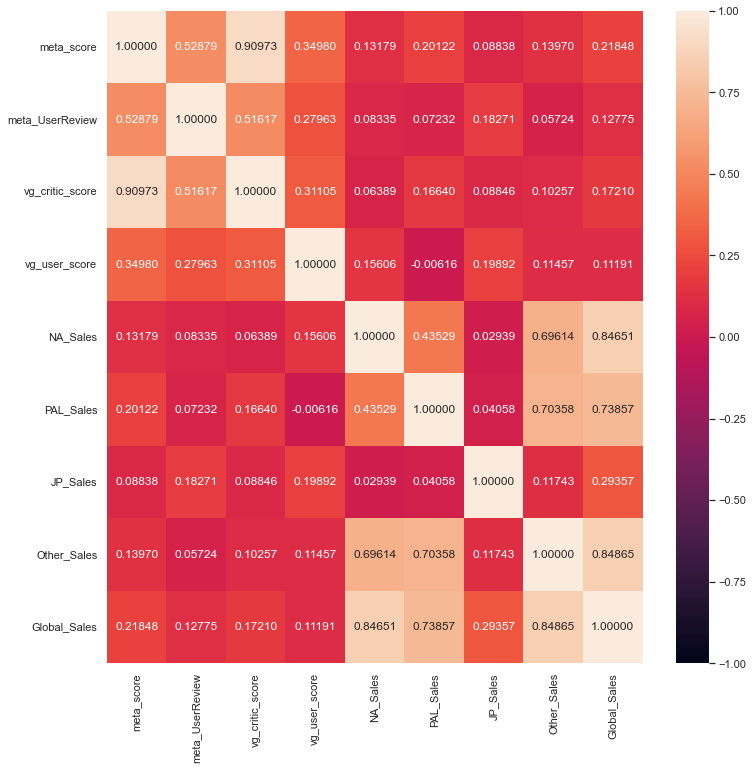

In [369]:
# correlation between all numerical data
tempdata = pd.DataFrame(data[["meta_score", "meta_UserReview",  "vg_critic_score", "vg_user_score", "NA_Sales", "PAL_Sales","JP_Sales", "Other_Sales", "Global_Sales"]])

# print correlation matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(tempdata.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".5f")

In [370]:
# draw pairs of variables against each other
sb.pairplot(data = tempdata)

Since Global_Sales is a sum of the other sales indicators, it is expected that they are rather strongly correlated. We will not be taking the sales indicators into consideration in our Machine Learning segment as the formula is already known (global sales is the sum of all other sales)

Additionally, the critic ratings of games across the Meta rating platform and VG rating platform are quite closely related, but the user ratings of the games are not.

However, it is interesting to note that meta_score, meta_UserReview, vg_critic_score nd vg_user_score do not correspond to the sales values. For most of these, there is either none or very weak correlation, meaning that the rating of the games do not correspond to the sales of the game.

In [ ]:
# release data to save memory
del(tempdata)

***
#### Distribution of categorical indicators

In [ ]:
# categorical predictors
tempdata = data[["Platform", "Genre","Publisher"]]
tempdata.describe()

,Platform,Genre,Publisher
count,5299,5299,5299
unique,18,18,288
top,PS2,Action,Electronic Arts
freq,769,915,314


From the above, we can see:
* Interestingly, PS2 has the highest number of games even though most modern games are not released on that platform
* Publisher is not a good indicator as there are too many publishers 
* Genre could potentially be a good indicator, but we don't know too much about it yet

***
##### Comparing Genre vs Sales

Number of Genres : 18
Action              915
Sports              665
Role-Playing        642
Shooter             612
Racing              409
Adventure           343
Platform            316
Fighting            287
Strategy            278
Misc                265
Simulation          257
Puzzle              122
Action-Adventure    108
Music                38
MMO                  16
Visual Novel         16
Party                 9
Education             1
Name: Genre, dtype: int64


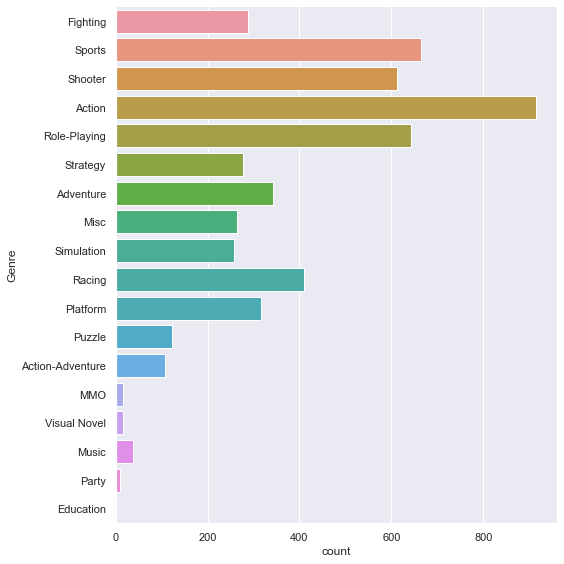

In [ ]:
# genres in the dataset
print("Number of Genres :", len(tempdata["Genre"].dropna().unique()))

# counts of each genre
print(tempdata["Genre"].dropna().value_counts())
sb.catplot(y = "Genre", data = tempdata, kind = "count", height = 8)

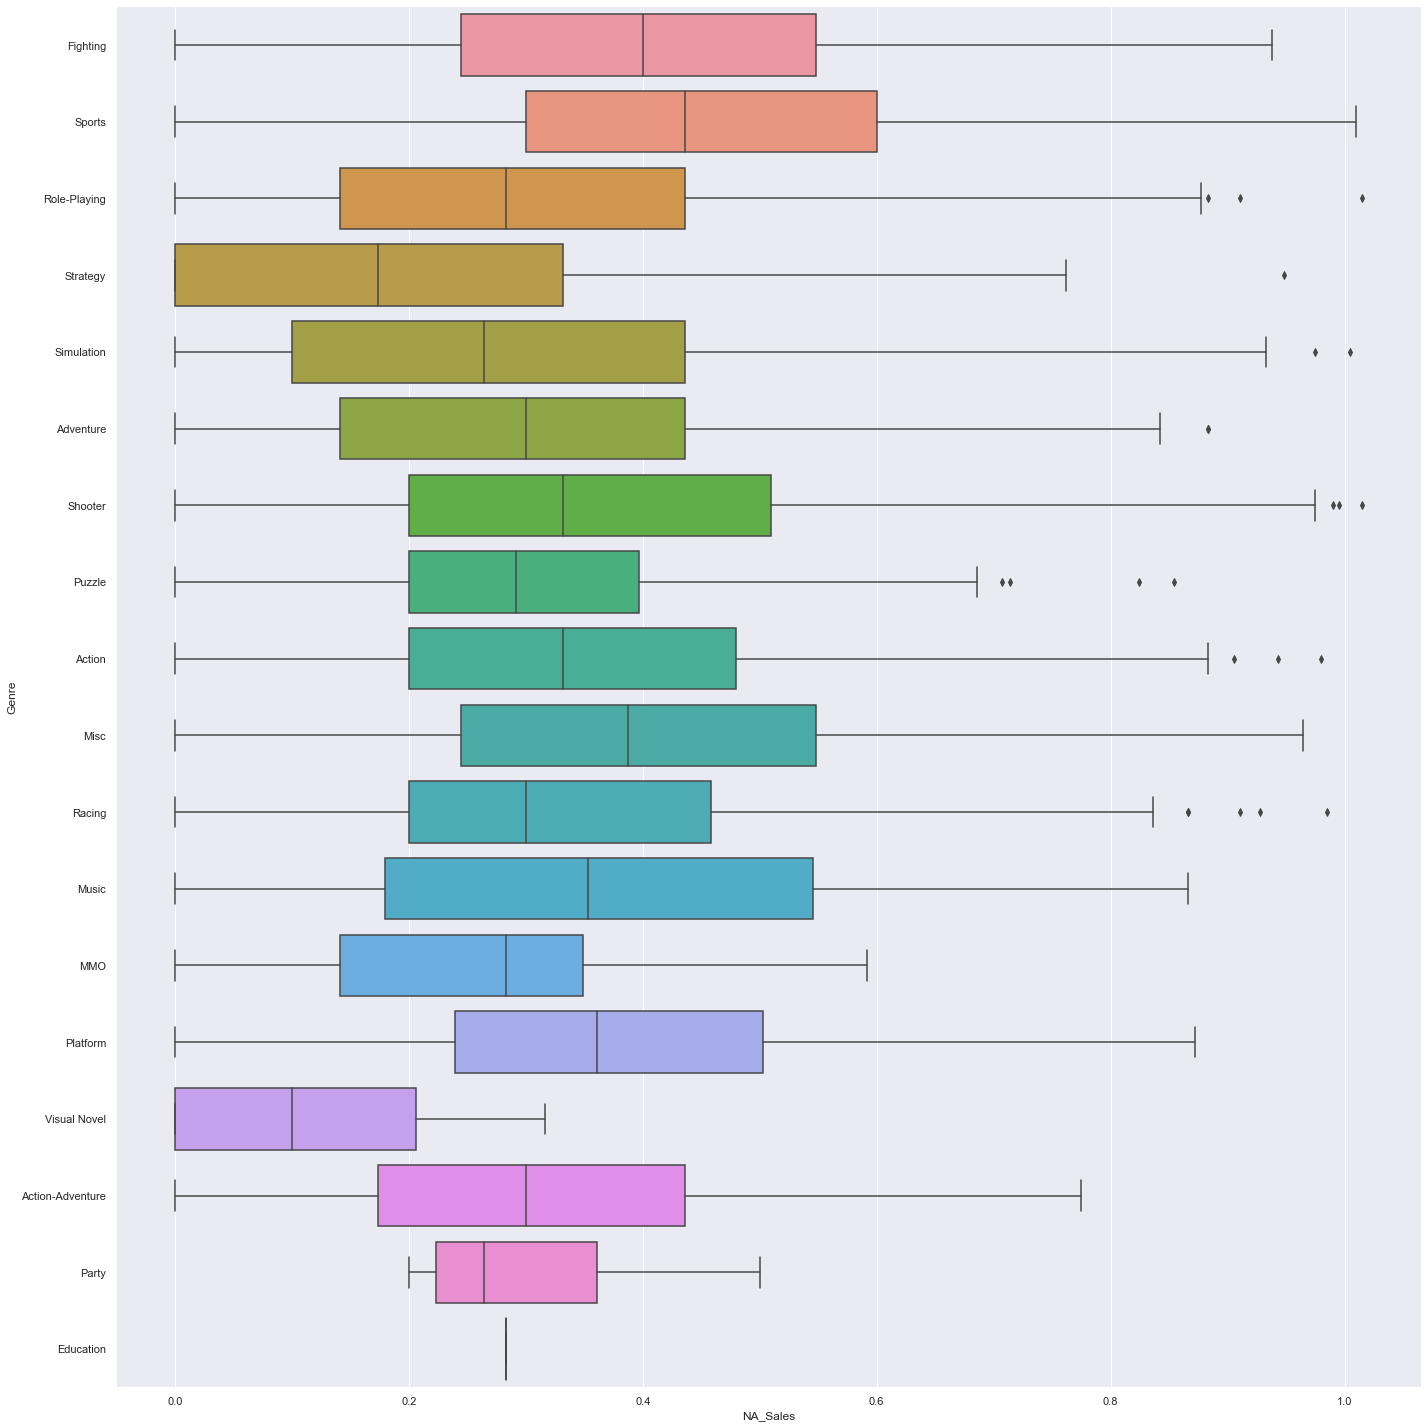

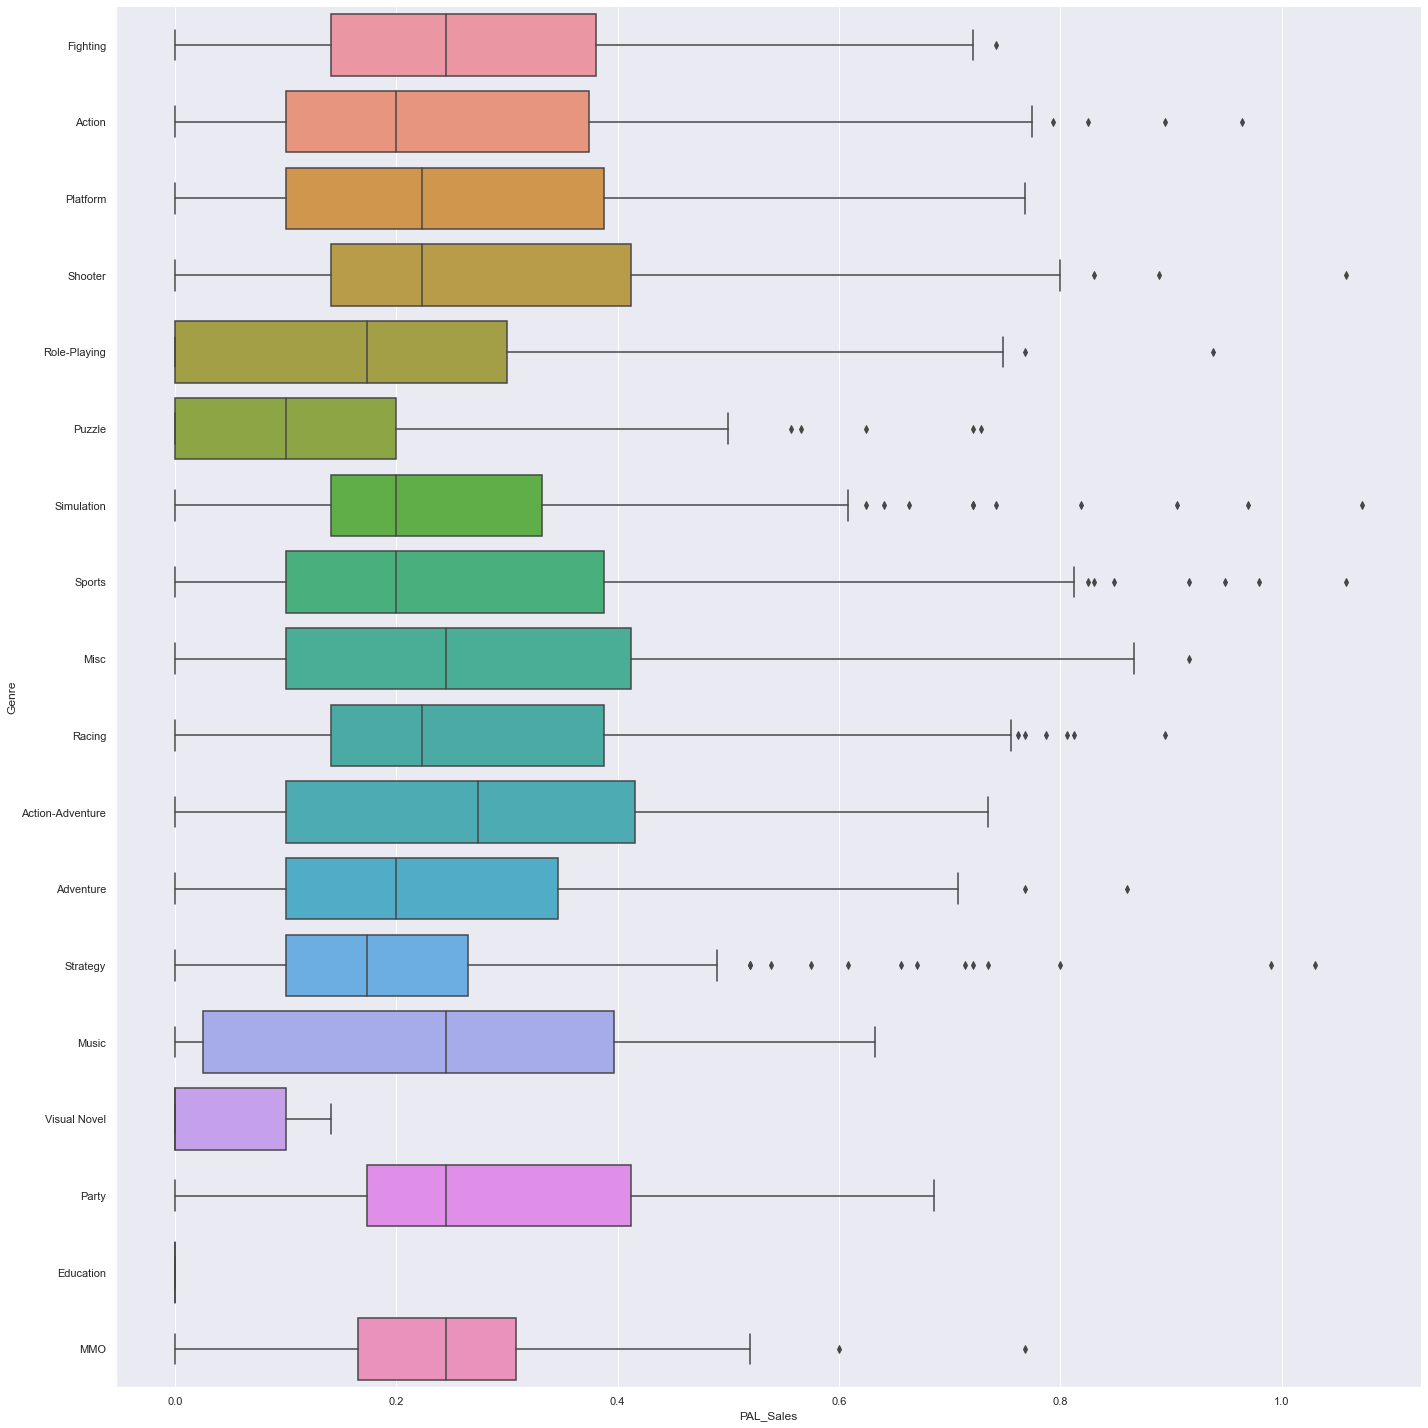

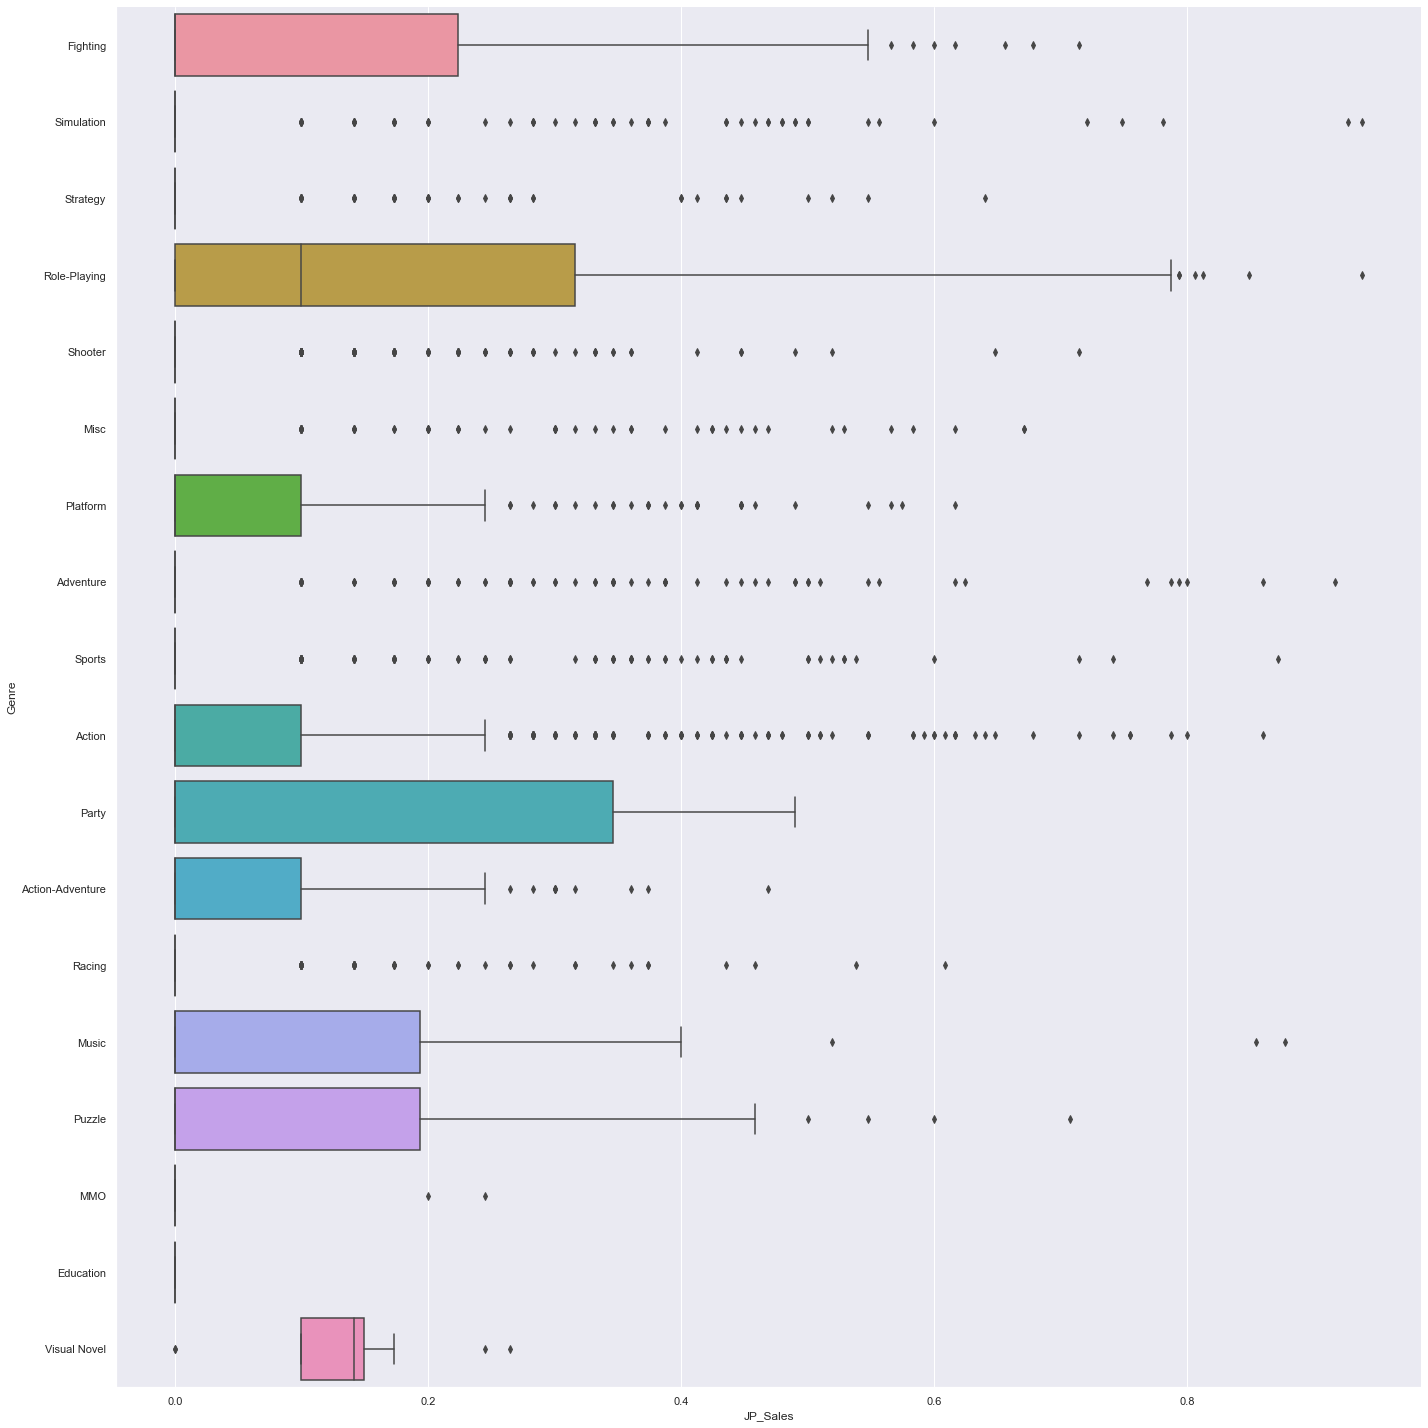

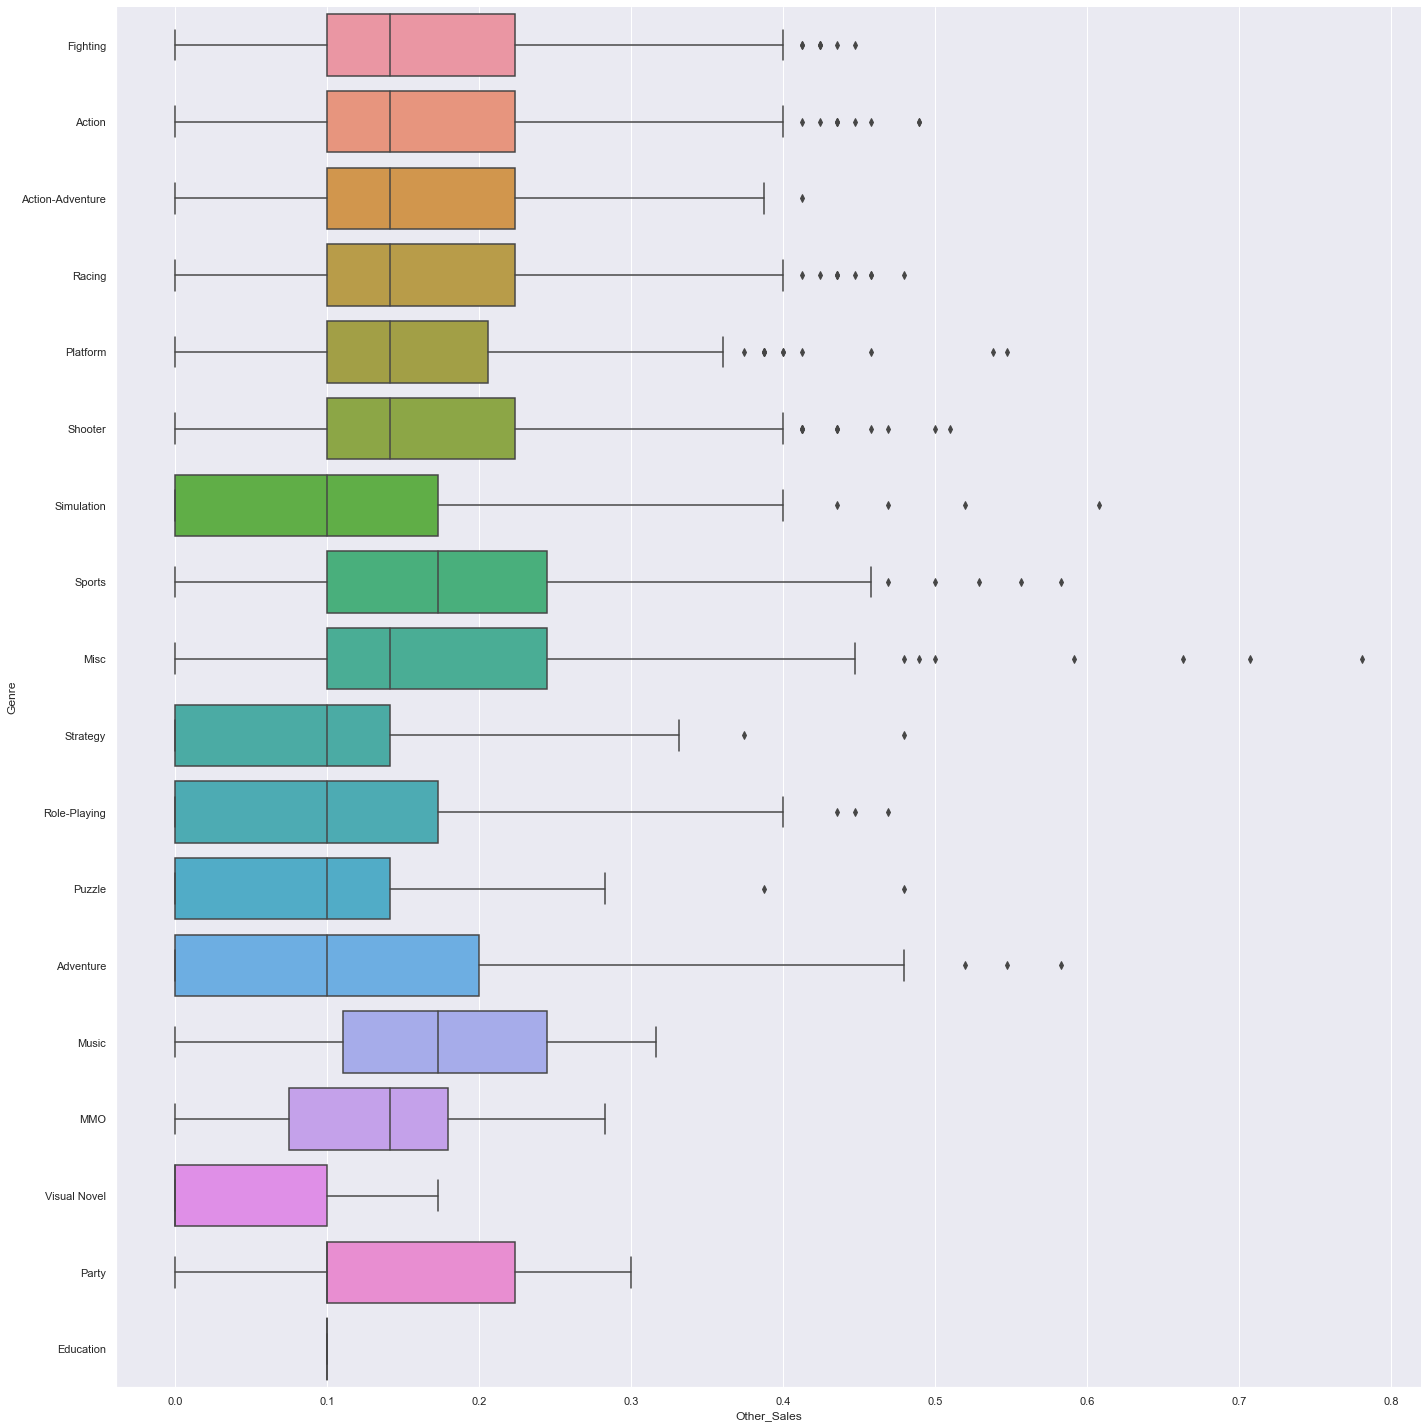

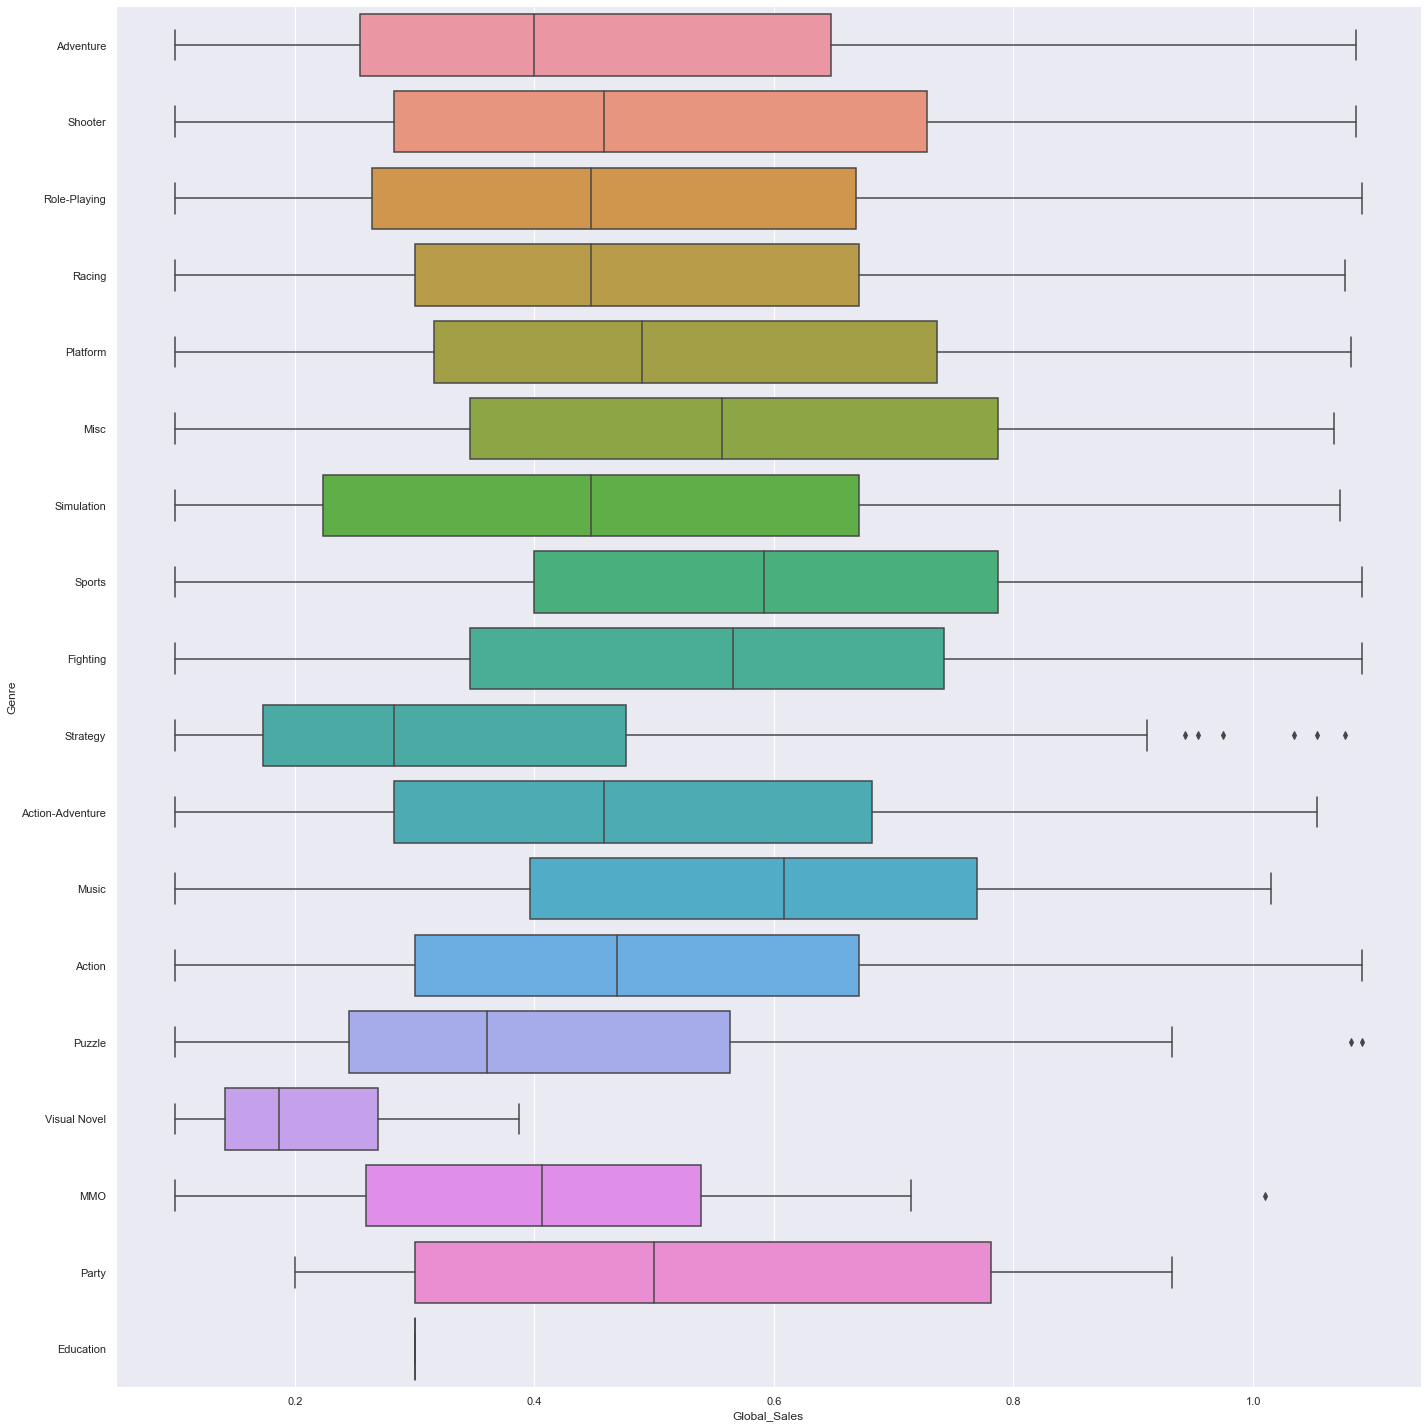

In [ ]:
tempsales = data[["NA_Sales", "PAL_Sales","JP_Sales", "Other_Sales", "Global_Sales"]]
for var in tempsales:
    sb.catplot(x = var, y = "Genre", kind = "box", data=data.sort_values(var), height = 20)
    
# release to save memory
del(tempsales)

Things to note:
* There's no obvious regional preference for specific generes
* There are a total of 18 genres of games here, and Action has the highest count.
* Music, Visual Novel, MMO, Party and Education can be safely removed from our dataset as they do not appear to have any clear correlation with Total_Sales, and they have too few rows to be useful to us
* There is not much else we can glean from this as there is no clear correlation between any genre selling better than other genres
* The data is weakly correlated

***
##### Comparing Platform vs Sales

Number of Platforms : 18
PS2     769
PC      698
X360    543
PS3     489
XB      482
PS4     412
DS      336
PSP     298
Wii     289
XOne    229
GBA     217
3DS     137
NS      128
PSV     106
PS       81
WiiU     41
N64      30
DC       14
Name: Platform, dtype: int64


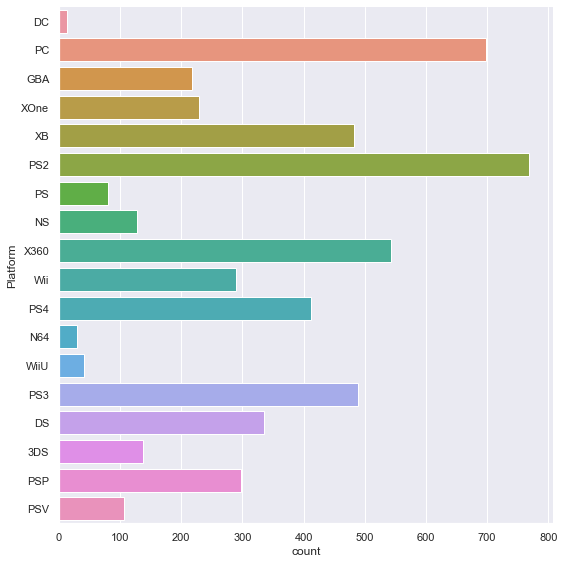

In [ ]:
# platforms in the dataset
print("Number of Platforms :", len(tempdata["Platform"].dropna().unique()))

# counts of each platform
print(tempdata["Platform"].dropna().value_counts())
sb.catplot(y = "Platform", data = tempdata, kind = "count", height = 8)

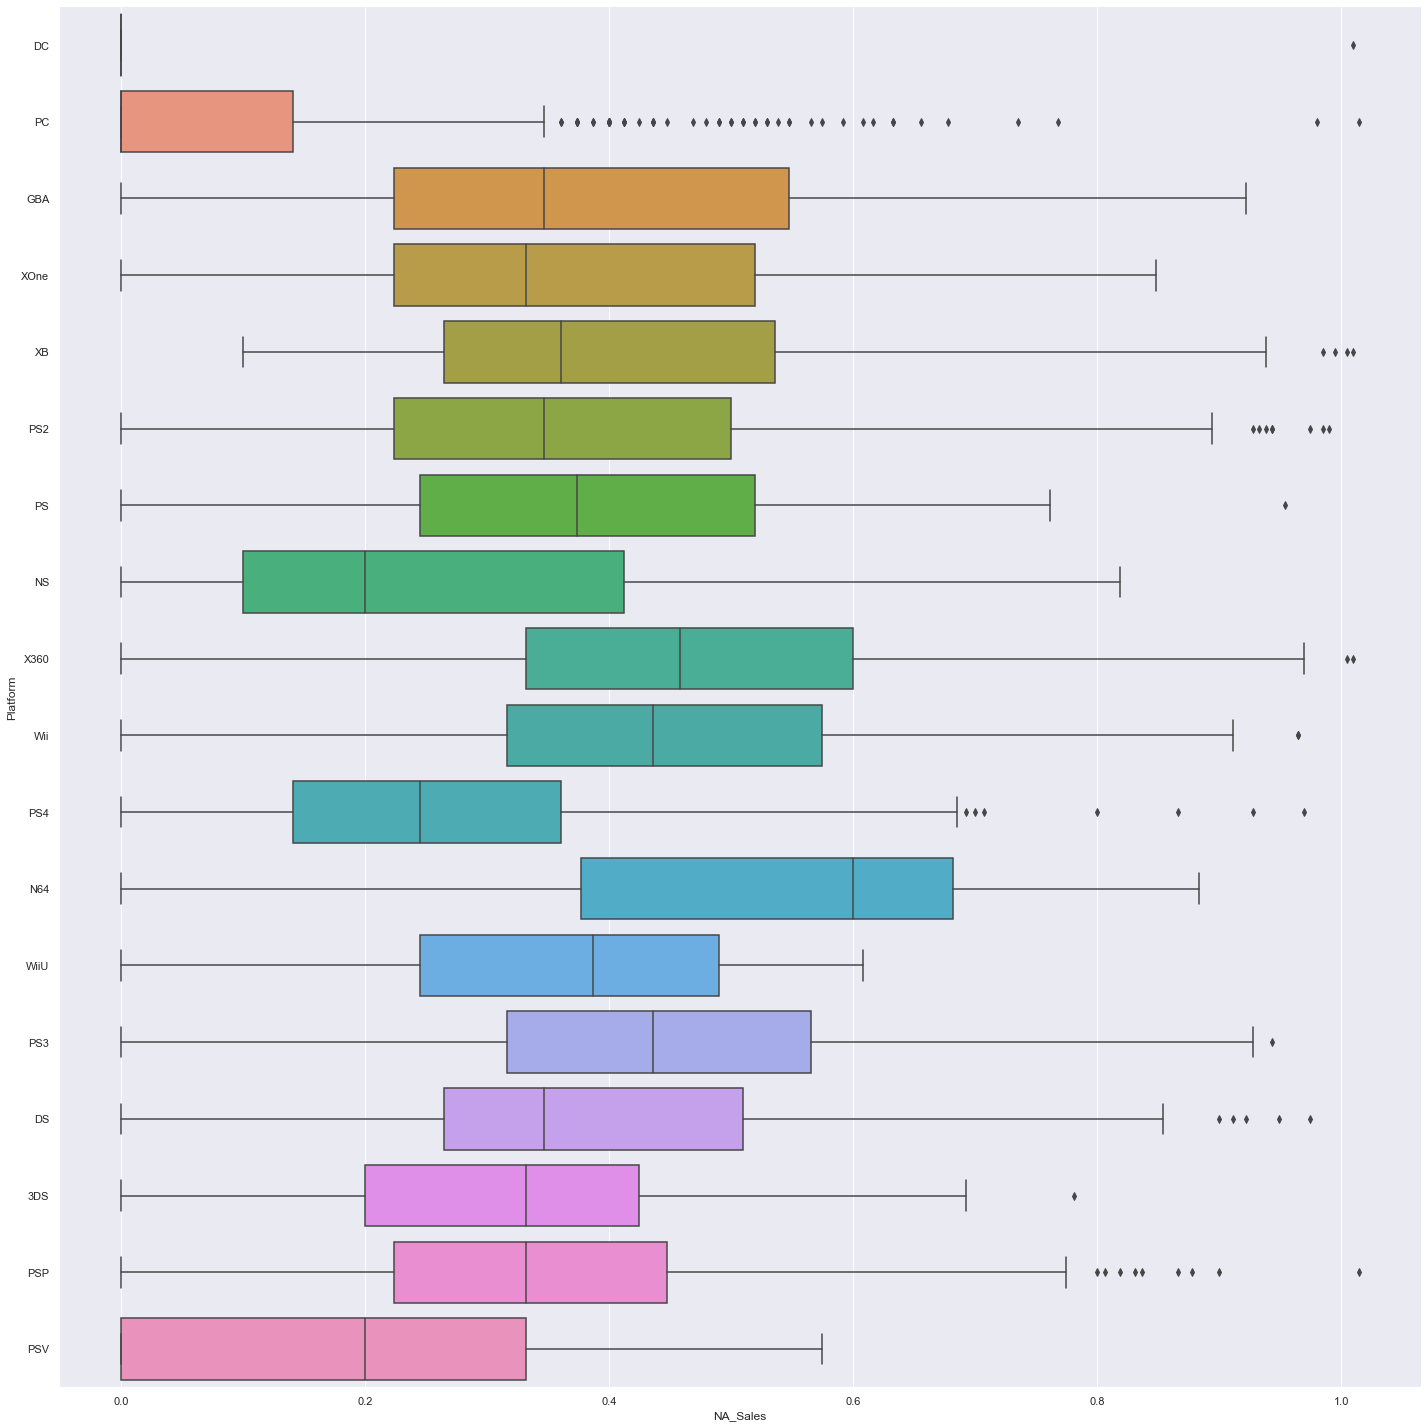

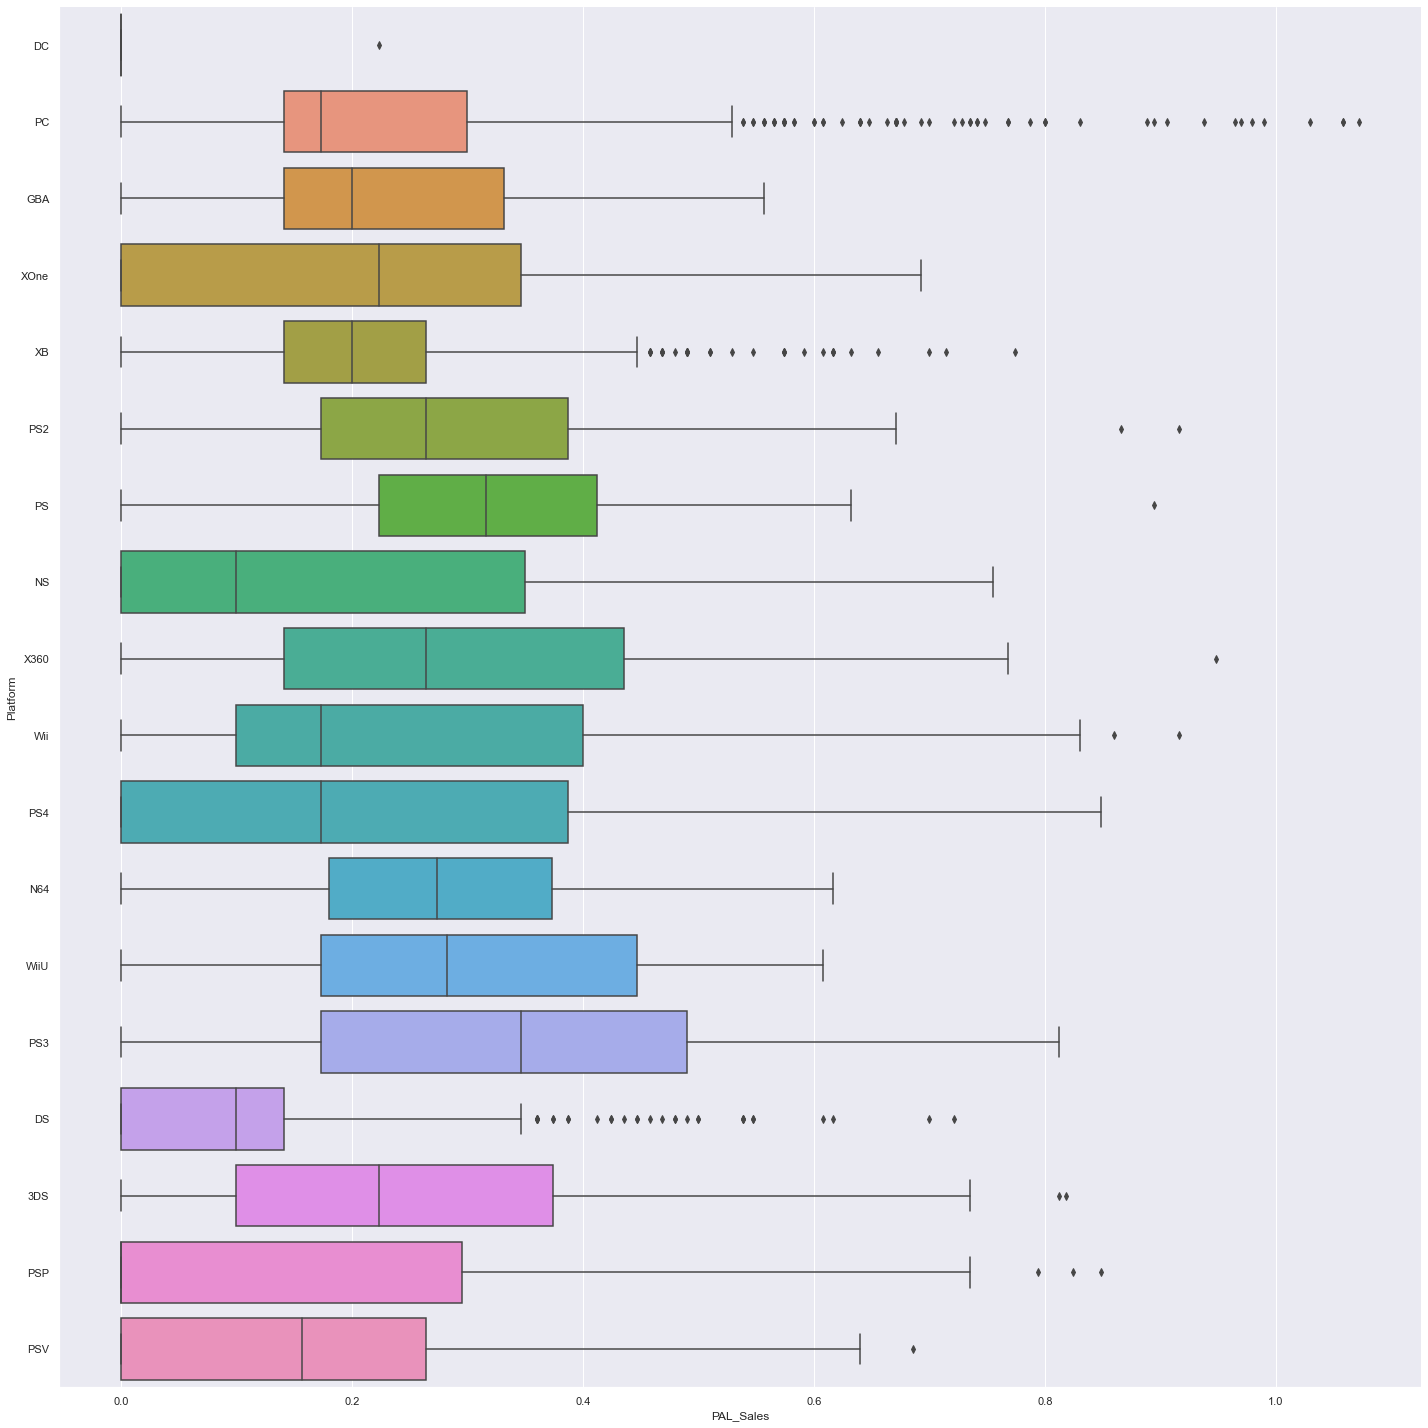

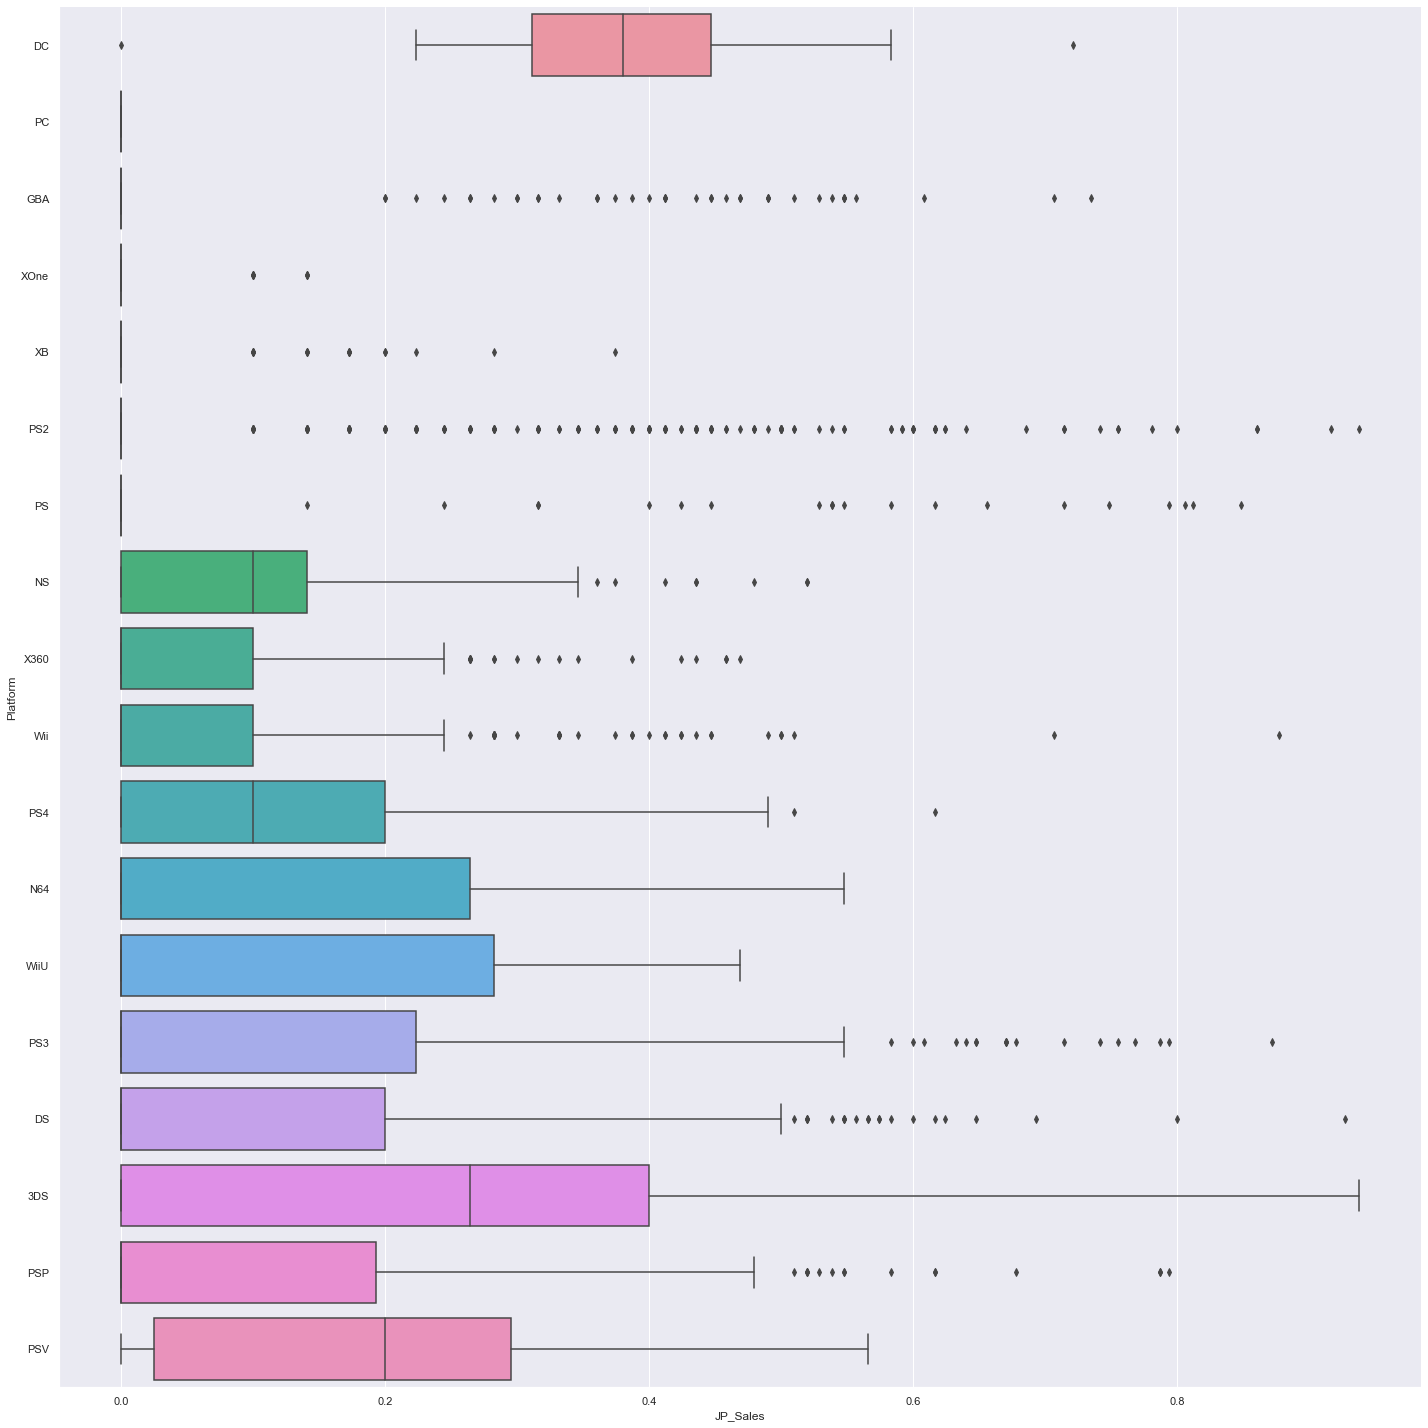

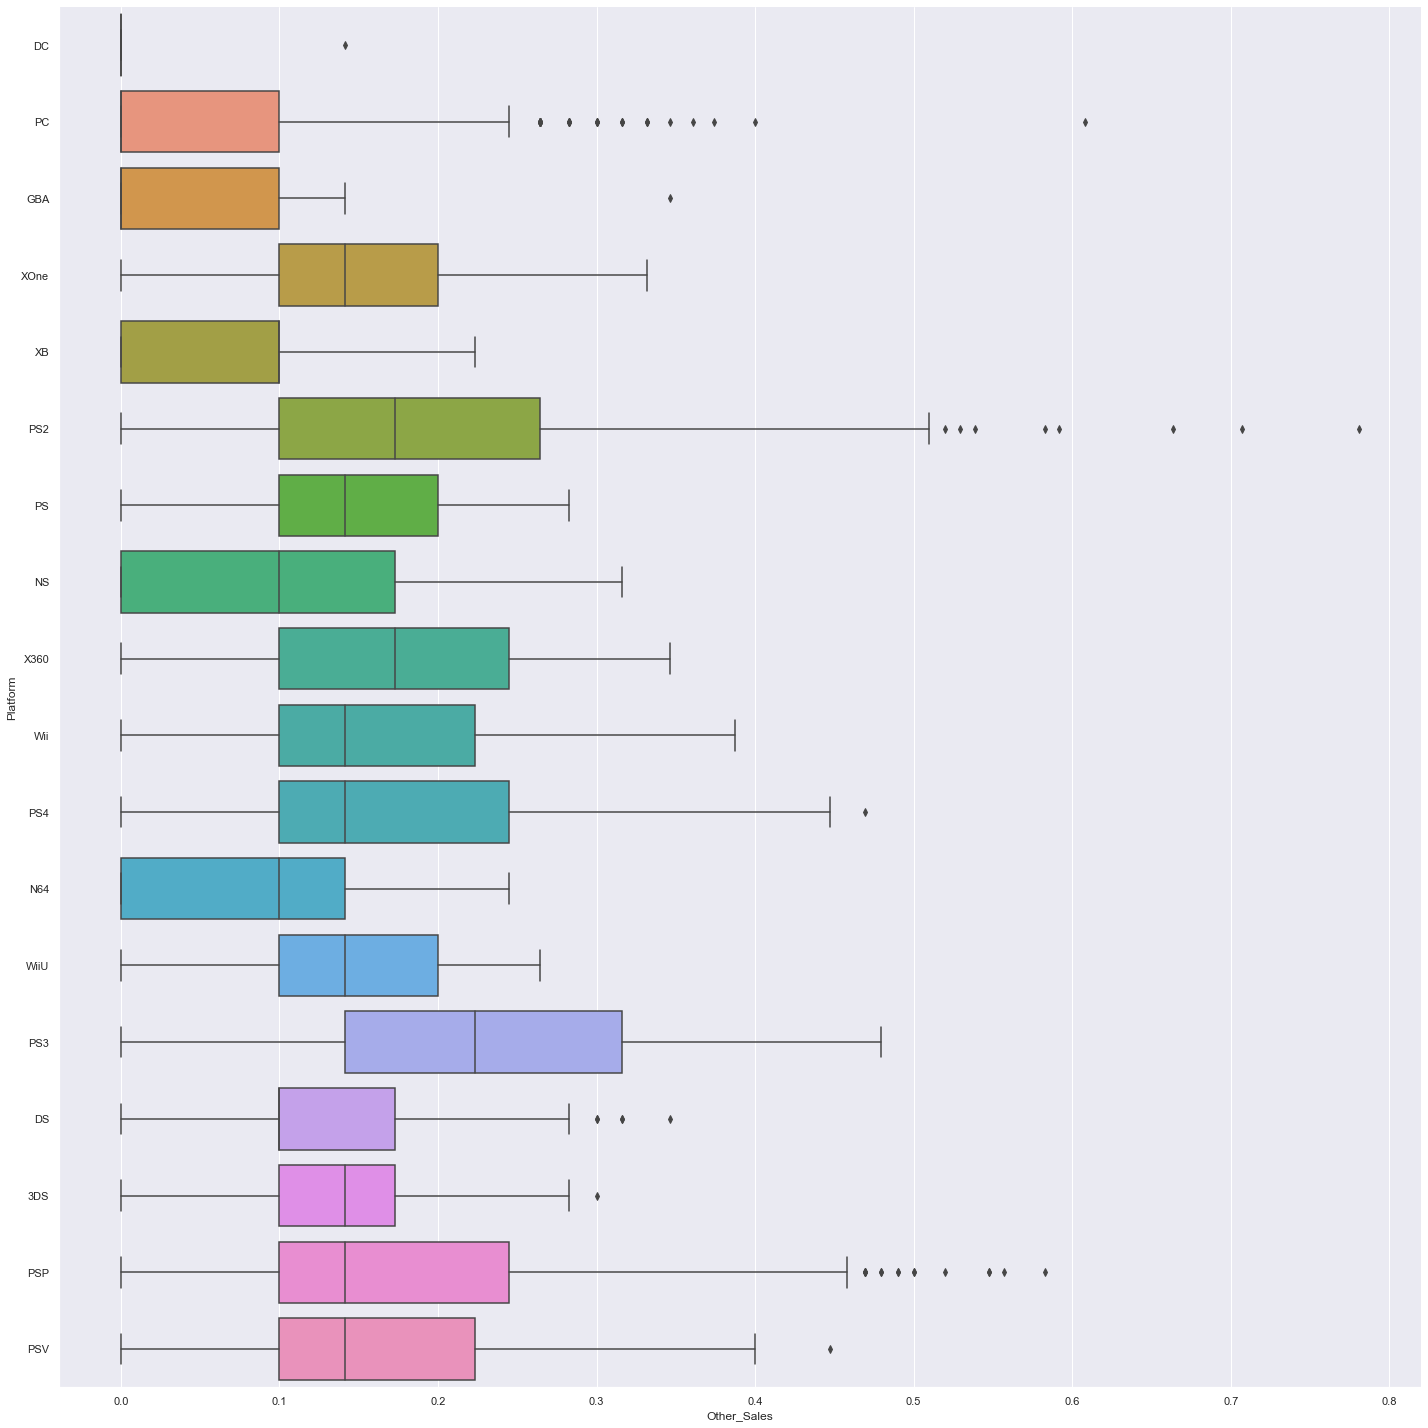

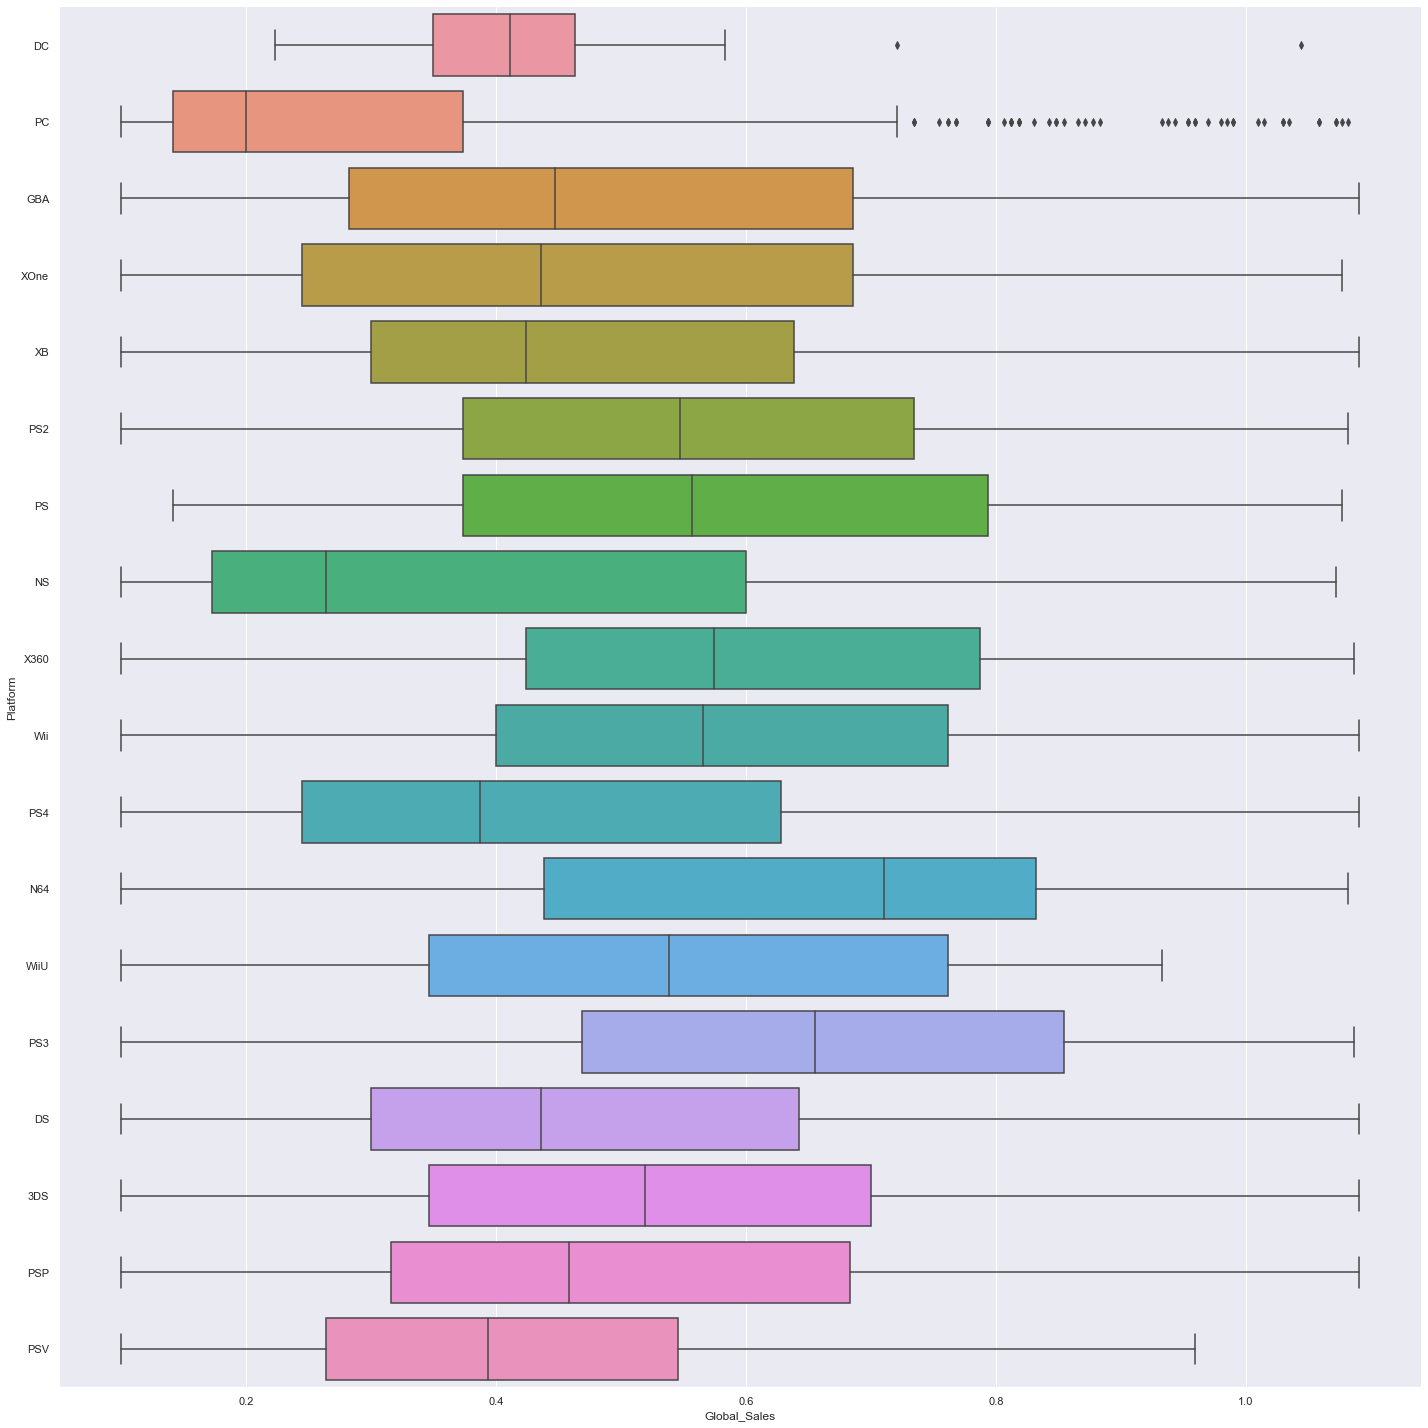

In [ ]:
tempsales = data[["NA_Sales", "PAL_Sales","JP_Sales", "Other_Sales", "Global_Sales"]]
for var in tempsales:
    sb.catplot(x = var, y = "Platform", kind = "box", data=data, height = 20)
    
    # tried sorting to make the comparisons more visible but didn't work
    # sb.catplot(x = var, y = "Platform", kind = "box", data=data.sort_values("Platform"), height = 20)
    
# release to save memory
del(tempsales)

Things to note:
* There's no obvious regional preference for platforms
* There are 18 Platforms and PS2 has the highest count
* There's no obvious pattern to determine if platforms will affect sales
* The data is weakly correlated

***
## Other Insights

Here, we will look at other insights that may be derived from the data

***
### Games of each year with highest sales

In [ ]:
# find the top game of the year by sales
GOTY = data.sort_values(["Year", "Global_Sales"], ascending = False).drop_duplicates("Year")
GOTY.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 5296 to 4184
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             27 non-null     object 
 1   Platform         27 non-null     object 
 2   meta_score       27 non-null     float64
 3   meta_UserReview  27 non-null     float64
 4   Year             27 non-null     int64  
 5   Genre            27 non-null     object 
 6   Publisher        27 non-null     object 
 7   Developer        27 non-null     object 
 8   vg_critic_score  16 non-null     float64
 9   vg_user_score    0 non-null      float64
 10  NA_Sales         27 non-null     float64
 11  PAL_Sales        27 non-null     float64
 12  JP_Sales         27 non-null     float64
 13  Other_Sales      27 non-null     float64
 14  Global_Sales     27 non-null     float64
dtypes: float64(9), int64(1), object(5)
memory usage: 3.4+ KB


In [ ]:
GOTY.head(27)

,Name,Platform,meta_score,meta_UserReview,Year,Genre,Publisher,Developer,vg_critic_score,vg_user_score,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales
5296,Tokyo Jungle,PS3,74.0,8.1,2020,Action,Sony Computer Entertainment,PlayStation C.A.M.P.!,NaN,NaN,0.000000,0.000000,0.509902,0.000000,0.509902
3107,Judgment,PS4,80.0,8.5,2019,Action-Adventure,Sega,Sega,NaN,NaN,0.000000,0.000000,0.469042,0.000000,0.469042
3826,Crash Bandicoot N. Sane Trilogy,NS,78.0,8.1,2018,Platform,Activision,Toys for Bob,6.0,NaN,0.663325,0.754983,0.141421,0.300000,1.053565
7581,Miitopia,3DS,67.0,7.9,2017,Role-Playing,Nintendo,Nintendo EPD,6.6,NaN,0.547723,0.734847,0.509902,0.264575,1.081665
1670,Final Fantasy XV,XOne,83.0,7.7,2016,Role-Playing,Square Enix,Square Enix,NaN,NaN,0.848528,0.547723,0.100000,0.331662,1.067708
7058,Dragon Ball: Xenoverse,PS4,69.0,7.7,2015,Fighting,Namco Bandai Games,Dimps Corporation,NaN,NaN,0.574456,0.741620,0.374166,0.412311,1.090871
2483,Sunset Overdrive,XOne,81.0,7.8,2014,Action,Microsoft Studios,Insomniac Games,8.0,NaN,0.800000,0.648074,0.000000,0.316228,1.077033
4129,NCAA Football 14,X360,77.0,6.0,2013,Sports,EA Sports,EA Tiburon,7.6,NaN,1.004988,0.000000,0.000000,0.346410,1.063015
7797,Mario & Sonic at the London 2012 Olympic Games,3DS,66.0,6.4,2012,Sports,Sega,Sega,6.5,NaN,0.424264,0.812404,0.519615,0.282843,1.090871
4557,LEGO Star Wars III: The Clone Wars,PS3,76.0,7.6,2011,Action,LucasArts,Traveller's Tales,8.0,NaN,0.721110,0.685565,0.000000,0.435890,1.086278


Things to note:
* Most of these games have rather high ratings. The exception is SimCity in 1989 with a meta_UserReview of only 2.2
* Most of these games have over 1m copies sold
* Most of these games are rather well known and are still played today
* Most of these games are also developed and published by renowned developers and publishers

# End of EDA
Despite the not very good correlation between the ratings and Global_Sales, we decide to proceed on with the machine learning section

In [ ]:
ml = data
# ml = pd.concat([ml,pd.get_dummies(ml['Genre'])],axis=1)
# ml.drop("Genre",axis =1,inplace = True)
ml.drop("vg_user_score",axis =1,inplace = True)
ml.head()
ml.to_csv('ml_dataSet.csv')



In [ ]:
ml.head()

,Name,Platform,meta_score,meta_UserReview,Year,Genre,Publisher,Developer,vg_critic_score,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales
3,SoulCalibur,DC,98.0,8.4,1999,Fighting,Namco,Namco,9.6,0.000000,0.000000,0.583095,0.000000,0.583095
20,NFL 2K1,DC,97.0,6.2,2000,Sports,Sega,Visual Concepts,9.6,1.009950,0.223607,0.000000,0.141421,1.044031
28,The Orange Box,PC,96.0,9.3,2007,Shooter,Electronic Arts,Valve Software,9.7,0.000000,0.331662,0.000000,0.141421,0.374166
36,BioShock,PC,96.0,8.6,2007,Shooter,2K Games,2K Australia / 2K Boston,9.6,0.100000,0.624500,0.000000,0.100000,0.640312
50,Tony Hawk's Pro Skater 2,GBA,95.0,6.9,2001,Sports,Activision,Vicarious Visions,8.9,0.921954,0.556776,0.000000,0.141421,1.086278
